# TITLE:   BANK MARKETING                                                         

PROJECT BY:-

 1):SHALAKA THORAT  
 2):PRABHAV KARVE  
 3):PRASAD MISTARY  
 4):SAYLI SHRUNGARE  
                           

# ABSTRACT / SUMMARY OF PROBLEM STATEMENT:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. 

Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).



# POTENTIAL USE-CASES / APPLICATIONS OF THE PROJECT:

From the analysis of the project, we can have some business suggestions for the Bank Institution.

Thus, this will help the Institution to take into account several dependent factors for Direct Marketing Campaigns and thereby increase the no. of clients subscribing to their bank term deposit.

#  INSIGHTS ABOUT THE CURRENT PROBLEM:

Firstly, we wanted to investigate why many no. of clients have denied for subscription of the product and further how the scope can be increased.

So, an EDA was done for the same. To predict the customer response to bank direct marketing, various classifiers were used, this was the first objective. 
Second objective was to identify the key features of customers who subscribed and are most likely to subsequently subscribe to term deposits.

As mentioned earlier, we have came up with several Suggestions for the Bank Institution:

* Focus on the customers who have had business before with the bank, they are more likely to stay.
* Customers who attended the campaign for 1-3 times and spent more time on the phone during campaign are likely to subscribe.
* Customers who have stable cash balance are more likely to deposit money in the bank.
* 3-5 days after the campaign is the best time to follow up the customers.
* Customers with a minimum of Secondary School Education are good prospects to be targeted for the bank term deposit subscriptions.
* Customers having no default must be targeted.
* Contact month should be April-August.
* Age should be 30-40 preferrably Married.
* Contact type should be Cellular.
* Both Housing as well as Personal Loans can be offered by the bank.

# ALGORITHMS USED:



  1:LOGISTIC REGRESSION
 
  2:LINEAR DISCRIMINANT ANALYSIS (LDA)
 
  3:K-NEAREST NEIGHBOURS CLASSIFIER (KNN)
 
  4:DECISION TREE CLASSFIER
 
  5:GAUSSIAN NAIVE BAYES ALGORITHM
 
  6:SUPPORT VECTOR MACHINE (SVM)
  
  7:EXTRA TREES CLASSIFIER 
 
  8:ADABOOST CLASSIFIER 
 
  9:GRADIENT BOOSTING CLASSIFIER
 
 10:RANDOM FOREST CLASSIFIER 


# SUMMARY OF PACKAGES AND MODULES USED:



1: We have used Pandas and Numpy for Numeric Operations wherever necessary.


2: We have used Matplotlib and Seaborn(mostly) for Data Visualization.

3: We have majorly used Sklearn and Keras for Training our Model.
Initially we split our data by Sklearn's Train_Test_Split Method.
For Evaluation of Model,we have used Confusion Matrix and have made a Classification Report from sklearn.metrices for numeric study of the output.

4: We also have compared the Accuracy of our Model by using Multiple Algorithms that include Logistic Regression, KNN and many more.

5: We have used MLPclassifier from sklearn.neural_network for making a Deep Learning Model.

6:Further we have used Dense Layers of Keras and optimised it using tanh,sigmoid etc.

# IMPORTING REQUIRED LIBRARIES AND DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_excel("bank-full.xlsx")

In [3]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Y is the target variable which describes whether the client subscribed a deposit after the campaign. We deleted the entie social and economic context variables(emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed) because they have quite low relevancy with the target variable and our model in this case. Thus, we haven't used the files in the 'bank-additional' folder.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

#   EXPLORATORY  DATA  ANALYSIS 

## * VARIOUS COUNT PLOTS AND HISTOGRAM

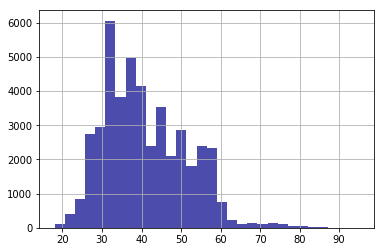

In [6]:
train['age'].hist(bins=30,color='darkblue',alpha=0.7)

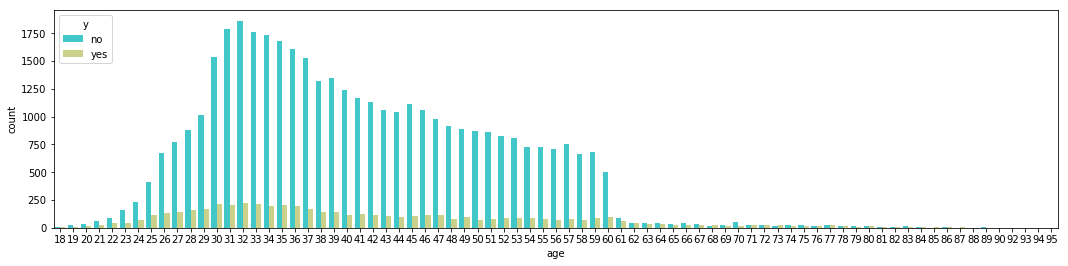

In [7]:
plt.figure(figsize=(18,4))
sns.countplot(x='age',hue='y',data=train,palette='rainbow')

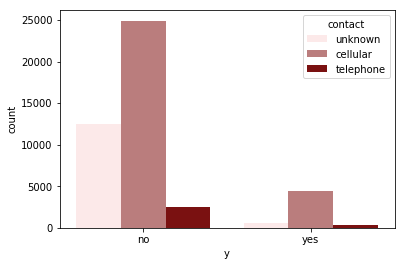

In [8]:
sns.countplot(x='y',hue='contact',data=train,color='darkred')

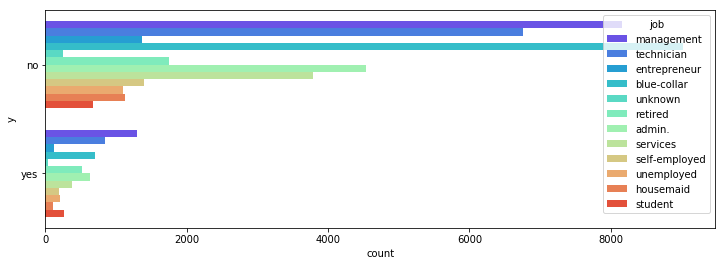

In [9]:
plt.figure(figsize=(12,4))
sns.countplot(y='y',hue='job',data=train,palette='rainbow')

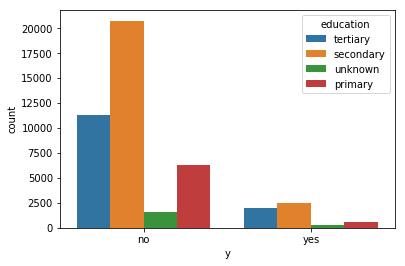

In [10]:
sns.countplot(x='y',hue='education',data=train)

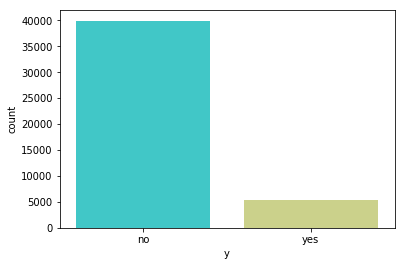

In [11]:
sns.countplot(x='y',data=train,palette='rainbow')

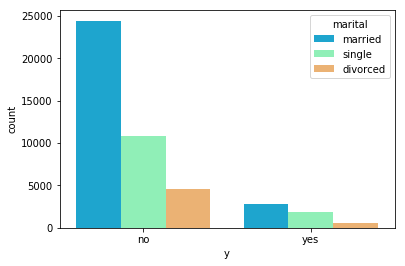

In [12]:
sns.countplot(x='y',hue='marital',data=train,palette='rainbow')

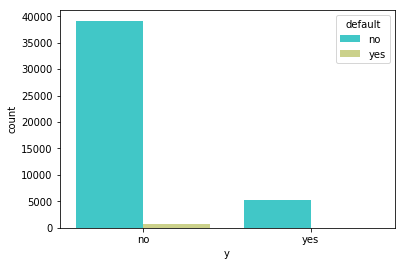

In [13]:
sns.countplot(x='y',hue='default',data=train,palette='rainbow')

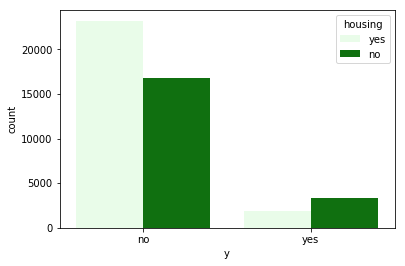

In [14]:
sns.countplot(x='y',hue='housing',data=train,color='green')

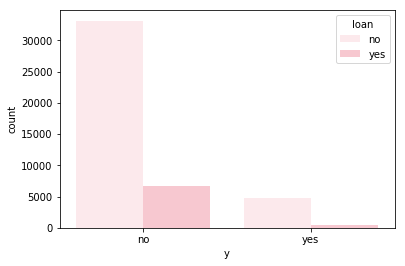

In [15]:
sns.countplot(x='y',hue='loan',data=train,color='pink')

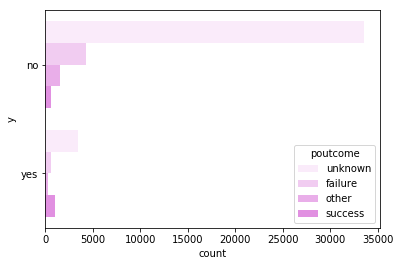

In [16]:
sns.countplot(y='y',hue='poutcome',data=train,color='violet')

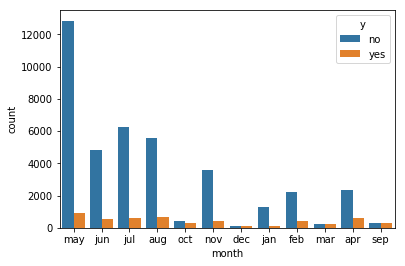

In [17]:
sns.countplot(x='month',hue='y',data=train)

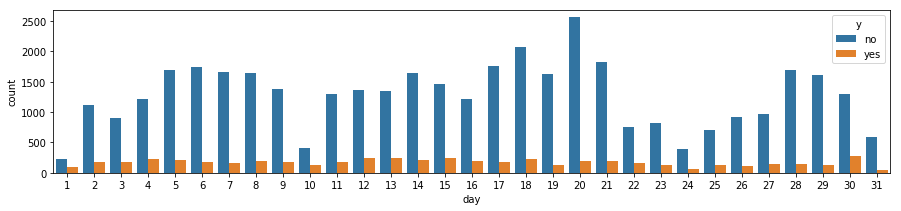

In [18]:
plt.figure(figsize=(15,3))
sns.countplot(x='day',hue='y',data=train)

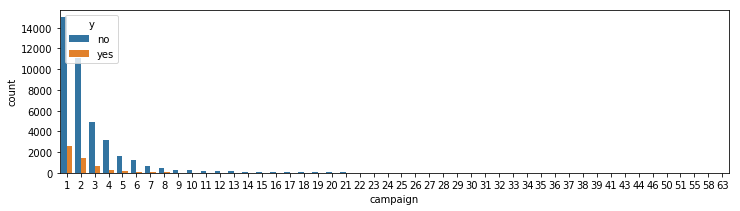

In [19]:
plt.figure(figsize=(12,3))
sns.countplot(hue='y',x='campaign',data=train)

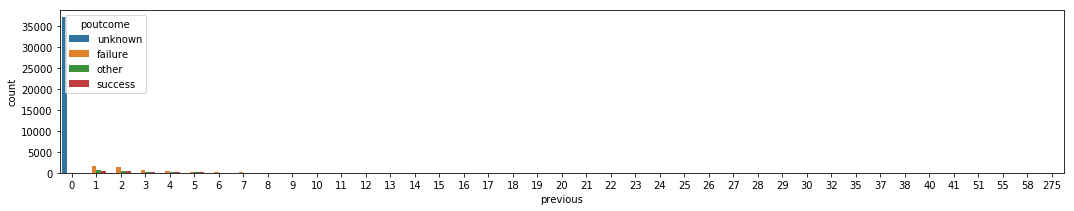

In [20]:
plt.figure(figsize=(18,3))
sns.countplot(hue='poutcome',x='previous',data=train)

## * BOX PLOTS

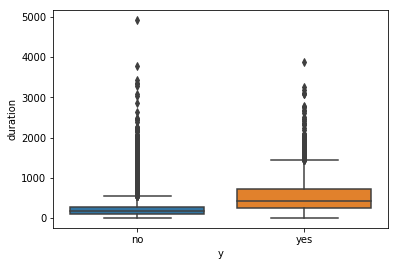

In [21]:
sns.boxplot(x='y',y='duration',data=train)

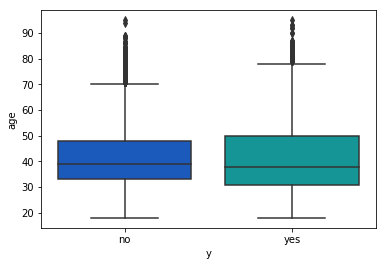

In [22]:
sns.boxplot(x='y',y='age',data=train,palette='winter')

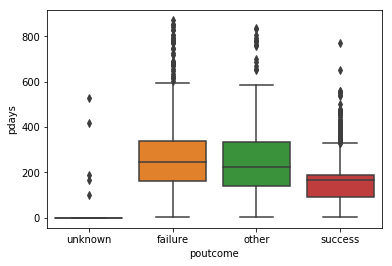

In [23]:
sns.boxplot(x='poutcome',y='pdays',data=train)

# LABEL ENCODING OF DATA

In [24]:
from sklearn.preprocessing import LabelEncoder  
LE=LabelEncoder()
train['job']=LE.fit_transform(train['job'])
train['marital']=LE.fit_transform(train['marital'])
train['education']=LE.fit_transform(train['education'])
train['default']=LE.fit_transform(train['default'])
train['housing']=LE.fit_transform(train['housing'])
train['loan']=LE.fit_transform(train['loan'])
train['contact']=LE.fit_transform(train['contact'])
train['month']=LE.fit_transform(train['month'])
train['poutcome']=LE.fit_transform(train['poutcome'])
train['y']=LE.fit_transform(train['y'])

In [25]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


# HEAT MAP OF CORRELATIONS

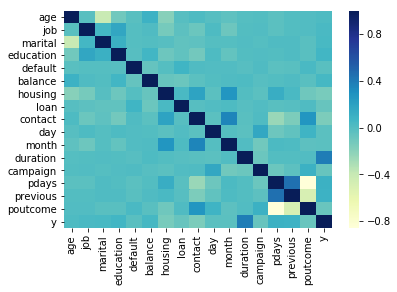

In [26]:
sns.heatmap(train.corr(),cmap="YlGnBu")

# TRAINING THE MODEL

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x=train.drop('y',axis=1)
y=train['y']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

# CLASSIFICATION USING LOGISTIC REGRESSION

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel=LogisticRegression()   
lm=logmodel.fit(x_train,y_train)
predictions=logmodel.predict(x_test)
logmodel.score(x_test,y_test)

C:\Users\Thorat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8945001474491301

In [31]:
print(logmodel.coef_)
print(logmodel.intercept_)

[[ 7.64392719e-03  6.11090869e-03  2.17164616e-01  2.08124427e-01
  -3.59804211e-01  1.61389573e-05 -1.04008379e+00 -6.39600590e-01
  -6.34418915e-01 -3.65922795e-03  2.83050758e-02  3.84356049e-03
  -1.29173448e-01  3.58255869e-03  8.03805980e-02  1.92436866e-01]]
[-3.87841905]


In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11967
           1       0.65      0.22      0.33      1597

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.78      0.60      0.64     13564
weighted avg       0.87      0.89      0.87     13564



In [33]:
matrix=confusion_matrix(y_test,predictions)
print(matrix)

[[11775   192]
 [ 1239   358]]


# SGD CLASSIFICATION

In [34]:
from sklearn.linear_model import SGDClassifier
SGD_clf = SGDClassifier()
SGD_clf.fit(x_train, y_train) 

C:\Users\Thorat\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
predictions = logmodel.predict(x_test)
SGD_clf.score(x_test, y_test)

0.8837363609554704

# CLASSIFICATION BY FEW MORE ALGORITHMS

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.simplefilter("ignore")

### CLASSIFICATION WITHOUT SCALING

In [37]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
results = []
names = []
n_splits = 5
for name, model in models:
    kfold = model_selection.KFold(n_splits=n_splits, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, x_train,y_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
results_df = pd.DataFrame(results, index=names,columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
LDA,88.562401,89.399684,88.813399,89.161005,89.334808,89.054259,0.356847
LR,88.483412,89.541864,88.576394,89.145205,89.018802,88.953136,0.433122
KNN,87.472354,88.151659,87.280771,87.960183,88.765998,87.926193,0.587325
CART,87.045814,86.872038,87.501975,86.727761,86.869964,87.003510,0.300589
NB,84.123223,83.475513,83.867910,83.757308,84.752726,83.995336,0.482987


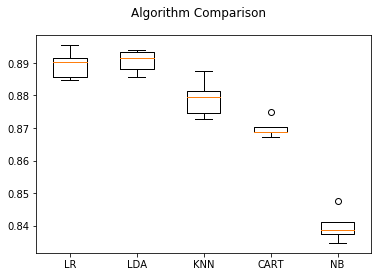

In [38]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### CLASSIFICATION WITH STANDARD SCALER

In [39]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
results = []
names = []
for name, model in pipelines:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
results_df = pd.DataFrame(results, index=names, columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledLDA,88.562401,89.399684,88.813399,89.161005,89.334808,89.054259,0.356847
ScaledKNN,88.988942,89.289100,88.418392,89.350608,89.097804,89.028969,0.370899
ScaledLR,88.436019,89.620853,88.623795,89.145205,89.097804,88.984735,0.467586
ScaledCART,86.793049,86.745656,87.296571,86.395955,87.122768,86.870800,0.350697
ScaledNB,83.522907,83.127962,83.457102,83.220098,84.231316,83.511877,0.433947


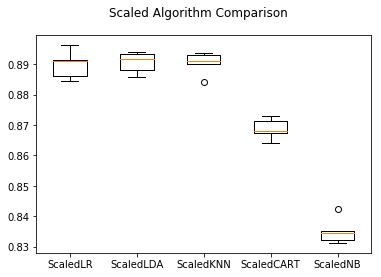

In [40]:
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### CLASSIFICATION WITH MIN-MAX SCALER

In [41]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB', GaussianNB())])))
results = []
names = []
for name, model in pipelines:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
results_df = pd.DataFrame(results, index=names, columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledLDA,88.562401,89.399684,88.813399,89.161005,89.334808,89.054259,0.356847
ScaledLR,88.436019,89.447077,88.528994,89.224206,89.129404,88.953140,0.446048
ScaledKNN,88.704581,88.783570,88.023384,88.971401,89.366409,88.769869,0.489429
ScaledCART,86.824645,87.314376,87.217570,86.680360,87.264971,87.060384,0.287692
ScaledNB,83.522907,83.127962,83.457102,83.220098,84.231316,83.511877,0.433947


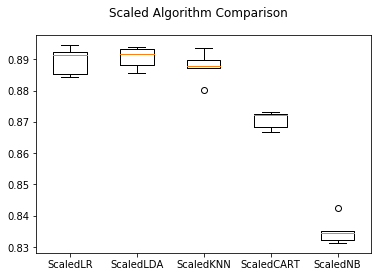

In [42]:
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### CLASSIFICATION USING ENSEMBLE METHODS

In [43]:
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))  
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))
results = []
names = []
for name, model in ensembles:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
results_df = pd.DataFrame(results, index=names,columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledGBM,90.031596,90.078989,89.872018,90.567230,90.298625,90.169692,0.269522
ScaledAB,89.115324,89.573460,89.366409,90.124822,89.524411,89.540885,0.372109
ScaledRF,89.526066,89.557662,88.955601,89.619213,89.808817,89.493472,0.320055
ScaledET,89.383886,89.526066,88.813399,89.540212,89.682414,89.389195,0.338780


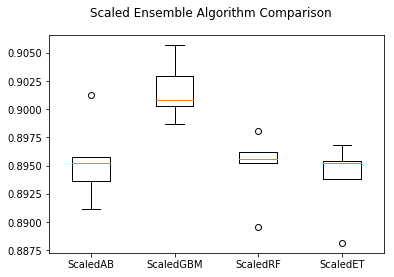

In [44]:
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### CLASSIFICATION USING SVM

In [45]:
train_d=pd.read_excel("bank.xlsx")
train_d.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [46]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
train_d['job']=LE.fit_transform(train_d['job'])
train_d['marital']=LE.fit_transform(train_d['marital'])
train_d['education']=LE.fit_transform(train_d['education'])
train_d['default']=LE.fit_transform(train_d['default'])
train_d['housing']=LE.fit_transform(train_d['housing'])
train_d['loan']=LE.fit_transform(train_d['loan'])
train_d['contact']=LE.fit_transform(train_d['contact'])
train_d['month']=LE.fit_transform(train_d['month'])
train_d['poutcome']=LE.fit_transform(train_d['poutcome'])
train_d['y']=LE.fit_transform(train_d['y'])

In [47]:
X=train_d.drop('y',axis=1)
Y=train_d['y']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [48]:
from sklearn.svm import SVC
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
result=[]
name=[]
cv_results = model_selection.cross_val_score(SVC(), X_train, Y_train, cv=kfold, scoring='accuracy')
result.append(cv_results)
name.append('SVC')    
results_df = pd.DataFrame(result, index=name, columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:5].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:5].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
SVC,89.099526,88.309637,86.255924,89.415482,89.082278,88.432569,1.283157


# CLASSIFICATION USING NEURAL NETWORK

In [49]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',activation='relu',alpha=0.0001,hidden_layer_sizes=(2,2), random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.882261869654969


# NEURAL NETWORK USING KERAS

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

In [51]:
from keras.utils.np_utils import to_categorical
y_cat = to_categorical(y)
y_cat[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y_cat,
                                                    test_size=0.2)
x.shape

(45211, 16)

In [53]:
model = Sequential()
model.add(Dense(2, input_shape=(16,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 2)                 34        
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [55]:
from keras.callbacks import EarlyStopping
early=EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model.fit(x_train, y_train, epochs=20,validation_split=0.1,callbacks=[early])

Train on 32551 samples, validate on 3617 samples
Epoch 1/20
32551/32551 [==============================] - 7s 218us/step - loss: 1.9536 - acc: 0.8778 - val_loss: 2.0054 - val_acc: 0.8749
Epoch 2/20
32551/32551 [==============================] - 4s 119us/step - loss: 1.8667 - acc: 0.8835 - val_loss: 2.0032 - val_acc: 0.8750
Epoch 3/20
32551/32551 [==============================] - 4s 118us/step - loss: 1.8664 - acc: 0.8836 - val_loss: 2.0032 - val_acc: 0.8750
Epoch 4/20
32551/32551 [==============================] - 4s 119us/step - loss: 1.8664 - acc: 0.8836 - val_loss: 2.0032 - val_acc: 0.8750
Epoch 5/20
32551/32551 [==============================] - 4s 119us/step - loss: 1.8664 - acc: 0.8836 - val_loss: 2.0032 - val_acc: 0.8750
Epoch 00005: early stopping


In [56]:
results = model.evaluate(x_test, y_test)
results

9043/9043 [==============================] - 0s 51us/step


[1.857756369727961, 0.8841092557779497]

In [57]:
model = Sequential()
model.add(Dense(8,input_shape=(16,),activation='tanh'))
model.add(Dense(2, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 18        
Total params: 154
Trainable params: 154
Non-trainable params: 0
_________________________________________________________________


In [59]:
early=EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model.fit(x_train, y_train, epochs=20,validation_split=0.1,callbacks=[early])

Train on 32551 samples, validate on 3617 samples
Epoch 1/20
32551/32551 [==============================] - 8s 249us/step - loss: 0.3604 - acc: 0.8825 - val_loss: 0.3623 - val_acc: 0.8750
Epoch 2/20
32551/32551 [==============================] - 4s 126us/step - loss: 0.3526 - acc: 0.8829 - val_loss: 0.3745 - val_acc: 0.8750
Epoch 3/20
32551/32551 [==============================] - 4s 126us/step - loss: 0.3465 - acc: 0.8832 - val_loss: 0.3693 - val_acc: 0.8750
Epoch 4/20
32551/32551 [==============================] - 4s 126us/step - loss: 0.3485 - acc: 0.8835 - val_loss: 0.3574 - val_acc: 0.8750
Epoch 5/20
32551/32551 [==============================] - 4s 125us/step - loss: 0.3467 - acc: 0.8835 - val_loss: 0.3770 - val_acc: 0.8750
Epoch 6/20
32551/32551 [==============================] - 4s 132us/step - loss: 0.3455 - acc: 0.8834 - val_loss: 0.3497 - val_acc: 0.8750
Epoch 7/20
32551/32551 [==============================] - 4s 127us/step - loss: 0.3510 - acc: 0.8838 - val_loss: 0.3897 - v

In [60]:
results = model.evaluate(x_test, y_test)
results

9043/9043 [==============================] - 0s 55us/step


[0.339951910975759, 0.8841092557779497]

# CONCLUSION:

Bank direct marketing and business decisions are more important than ever for preserving the relationship with the best customer. Data Mining and Predictive Analysis can provide help in such Marketing Strategies.

The classification performance of different algorithms have used the statistical measure of Accuracy. The data set has partitioned into training and test by the ratio 70% and 30% respectively (20% test data for Neural Network). Thus, Accuracy achieved through Various Algorithms is 85% to 90%. By using Ensemble Methods, Accuracy has increased to 89% to 90.5%. Neural Network has given an Accuracy accounting to 88.41%. 

Maximum Accuracy has been achieved through Logistic Regression which is 89.45% and that with the Ensemble Methods(Boosting) is 90.17% through Gradient Boosting Classifier.